In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv(r"D:\kaggle\diabetics prediction\diabetes_prediction_dataset.csv")



In [5]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()




In [6]:
# Initialize LabelEncoder
le = LabelEncoder()



In [7]:
# Apply Label Encoding to categorical columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    print(f"Classes for {col}: {le.classes_}")

# Check the updated DataFr
data.head(2)

Classes for gender: ['Female' 'Male' 'Other']
Classes for smoking_history: ['No Info' 'current' 'ever' 'former' 'never' 'not current']


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0


In [8]:
# Verify the data types of all columns
print(data.dtypes)


gender                   int32
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int32
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [9]:
# Assign features and target
X = data.drop(columns=['diabetes'])
y = data['diabetes']




In [10]:
# Check the first few rows of X and y
print(X.head())
print(y.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  
0          6.6                  140  
1          6.6                   80  
2          5.7                  158  
3          5.0                  155  
4          4.8                  155  
0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_dia_reg = LinearRegression()
lin_dia_reg.fit(X_train, y_train)


LinearRegression()

In [12]:
# Make predictions
y_pred = lin_dia_reg.predict(X_test)




In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')



Mean Squared Error: 0.05
R^2 Score: 0.34


In [14]:
# Plot regression line for each feature
features = X.columns


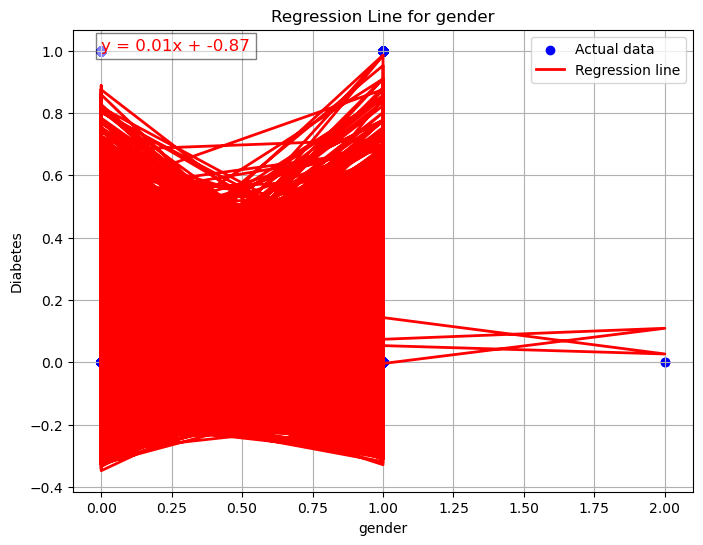

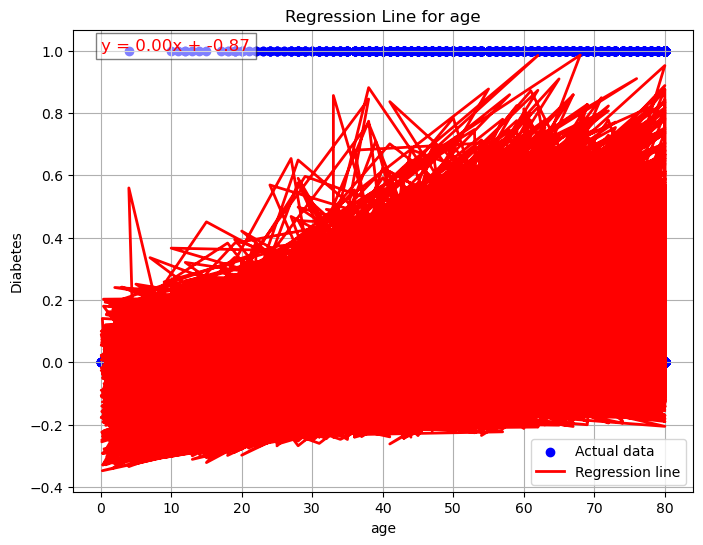

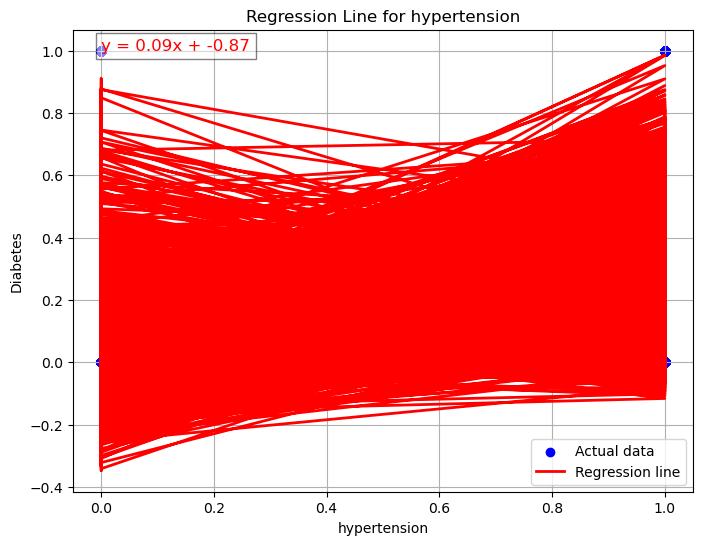

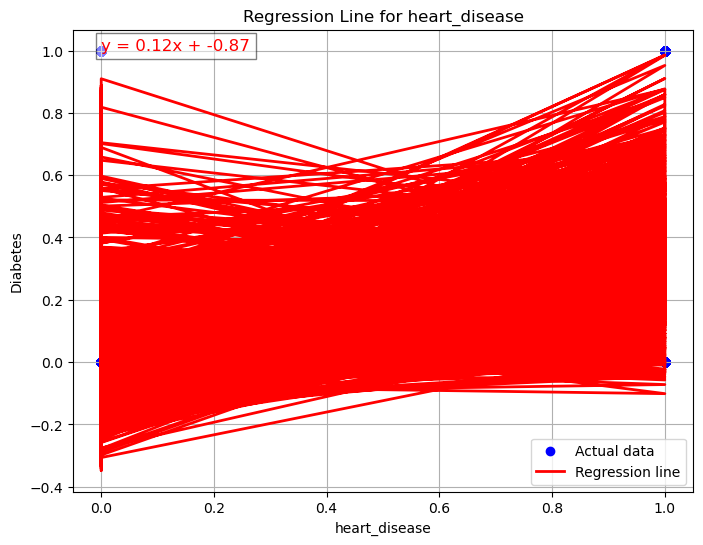

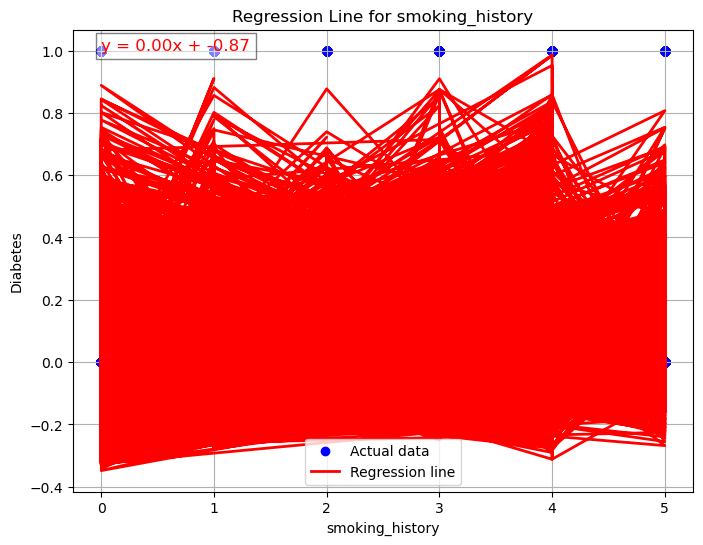

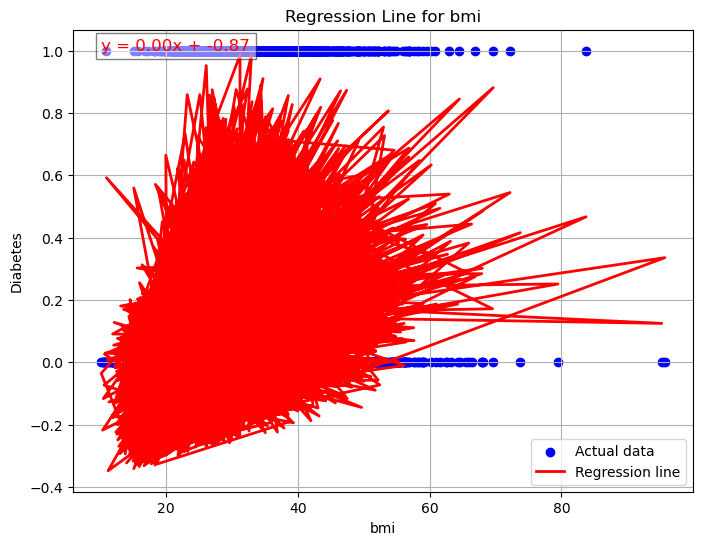

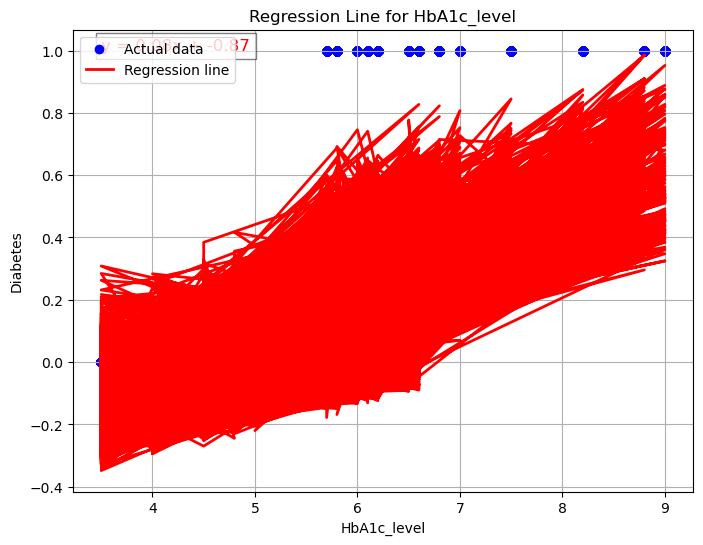

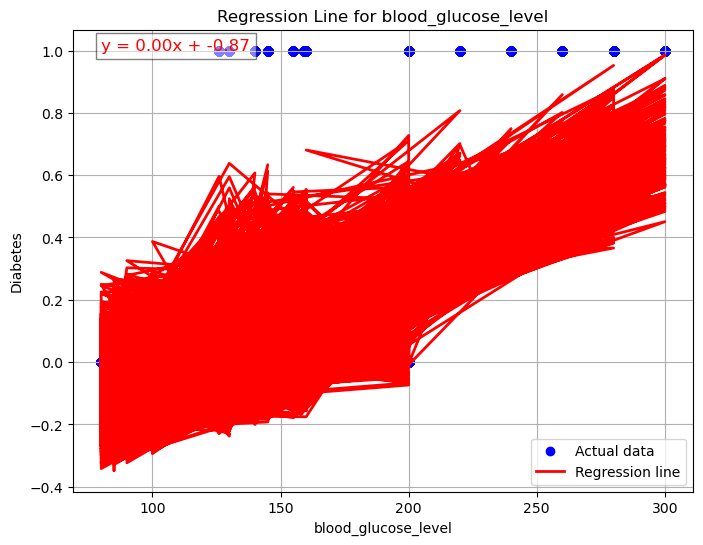

In [19]:
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual data')
    plt.plot(X_test[feature], y_pred, color='red', linewidth=2, label='Regression line')
    plt.xlabel(feature)
    plt.ylabel('Diabetes')
    plt.title(f'Regression Line for {feature}')
    
    # Display the formula on the plot
    coef = lin_dia_reg.coef_[list(X.columns).index(feature)]
    intercept = lin_dia_reg.intercept_
    formula = f'y = {coef:.2f}x + {intercept:.2f}'
    plt.text(X_test[feature].min(), y_test.max(), formula, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))
    
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
# Define the manual prediction array (example with the same feature set)
manual_array = np.array([[1, 70, 0, 0, 0, 23.5, 6.0, 110]])  # Adjust based on the dataset's feature range

# Make predictions with the manual array
manual_pred = lin_dia_reg.predict(manual_array)
print(f'Manual prediction: {manual_pred[0]:.2f}')

Manual prediction: 0.07


D:\EMPTY\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
